<a href="https://colab.research.google.com/github/Andyfer004/Lab7-IA/blob/main/Lab7IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Teoría

## 1. ¿Qué es el temporal difference learning y en qué se diferencia de los métodos tradicionales de aprendizaje supervisado? Explique el concepto de "error de diferencia temporal" y su papel en los algoritmos de aprendizaje por refuerzo

**Temporal Difference Learning (TD Learning)** es un método de aprendizaje por refuerzo que permite a un agente aprender una función de evaluación a partir de la experiencia sin necesidad de un modelo del entorno. A diferencia de los métodos tradicionales de aprendizaje supervisado, TD Learning no requiere datos etiquetados con salidas correctas, sino que ajusta su política basándose en las recompensas obtenidas.

El **error de diferencia temporal (TD Error)** mide la diferencia entre la recompensa esperada y la obtenida en un estado determinado. Se define como:

$$ TD\_Error = R + \gamma V(s') - V(s) $$

Donde:
- \( R \) es la recompensa obtenida.
- \( \gamma \) es el factor de descuento.
- \( V(s') \) es el valor del estado siguiente.
- \( V(s) \) es el valor del estado actual.

El TD Error permite actualizar la función de evaluación \( V(s) \) de manera progresiva a medida que el agente obtiene más experiencia.



## 2. En el contexto de los juegos simultáneos, ¿cómo toman decisiones los jugadores sin conocer las acciones de sus oponentes? De un ejemplo de un escenario del mundo real que pueda modelarse como un juego simultáneo y discuta las estrategias que los jugadores podrían emplear en tal situación

En juegos simultáneos, los jugadores toman sus decisiones sin conocer las acciones del oponente. Para optimizar sus resultados, pueden emplear:

- **Estrategia pura:** Siempre elegir la misma acción.
- **Estrategia mixta:** Asignar probabilidades a cada acción para hacer la estrategia impredecible.

### **Ejemplo: Negociaciones salariales**
Dos empleados pueden negociar su sueldo sin conocer las ofertas de la empresa. Algunas estrategias que pueden seguir son:
- **Estrategia agresiva:** Pedir un aumento alto esperando que la empresa acepte.
- **Estrategia conservadora:** Pedir un aumento moderado para evitar rechazo.
- **Estrategia mixta:** Variar la negociación en base a probabilidades.

En este tipo de juegos, la incertidumbre obliga a los jugadores a optimizar sus decisiones en función de posibles respuestas del oponente.



## 3. ¿Qué distingue los juegos de suma cero de los juegos de no suma cero y cómo afecta esta diferencia al proceso de toma de decisiones de los jugadores? Proporcione al menos un ejemplo de juegos que entren en la categoría de juegos de no suma cero y discuta las consideraciones estratégicas únicas involucradas

### Diferencia entre juegos de suma cero y no suma cero:
- **Juegos de suma cero:** La ganancia de un jugador implica la pérdida del otro. Ejemplo: Ajedrez.
- **Juegos de no suma cero:** Los jugadores pueden beneficiarse simultáneamente. Ejemplo: Dilema del Prisionero.

### **Ejemplo: Dilema del Prisionero**
Dos sospechosos pueden **testificar** o **negar** el crimen. La matriz de pagos es:

| A / B | Testifica | Niega |
|-------|----------|-------|
| **Testifica** | (-5, -5) | (-10, 0) |
| **Niega** | (0, -10) | (-1, -1) |

Las estrategias deben considerar:
- La cooperación podría ser mejor para ambos (negar).
- En ausencia de comunicación, el equilibrio de Nash es que ambos testifiquen.

En juegos de no suma cero, la cooperación y la confianza pueden ser clave para maximizar beneficios.



## 4. ¿Cómo se aplica el concepto de equilibrio de Nash a los juegos simultáneos? Explicar cómo el equilibrio de Nash representa una solución estable en la que ningún jugador tiene un incentivo para desviarse unilateralmente de la estrategia elegida

El **equilibrio de Nash** es una situación en la que ningún jugador mejora cambiando unilateralmente su estrategia. Matemáticamente, si dos jugadores siguen estrategias \( \pi_A^* \) y \( \pi_B^* \), se cumple:

$$ V_A(\pi_A^*, \pi_B^*) \geq V_A(\pi_A, \pi_B^*) $$
$$ V_B(\pi_A^*, \pi_B^*) \geq V_B(\pi_A^*, \pi_B) $$

Esto significa que, dada la estrategia del oponente, no hay incentivos para cambiar la propia.

### **Ejemplo: Dilema del Prisionero**
Si ambos testifican, aunque el resultado no sea óptimo, cambiar de estrategia (negar) resultaría en una peor situación para cada jugador. Por lo tanto, **testificar es el equilibrio de Nash**.

Este concepto es fundamental en economía, negociación y teoría de juegos, ya que permite encontrar estrategias estables en situaciones de competencia.



## 5. Discuta la aplicación del temporal difference learning en el modelado y optimización de procesos de toma de decisiones en entornos dinámicos. ¿Cómo maneja el temporal difference learning el equilibrio entre exploración y explotación y cuáles son algunos de los desafíos asociados con su implementación en la práctica?

TD Learning se aplica en problemas dinámicos donde el entorno cambia y la optimización es clave. Un ejemplo destacado es **Backgammon**, donde un agente ajusta los pesos de evaluación jugando contra sí mismo.

### **Exploración vs. Explotación**
Para equilibrar la exploración y la explotación, TD Learning utiliza estrategias como:
- **\(\epsilon\)-greedy:** Con probabilidad \( \epsilon \) se elige una acción aleatoria para explorar.
- **Reducción progresiva de \( \epsilon \):** Se inicia explorando más y se reduce la exploración con el tiempo.

### **Desafíos en su implementación**
1. **Convergencia lenta:** Aprender valores óptimos en entornos complejos puede ser costoso en términos de tiempo.
2. **Dependencia de hiperparámetros:** Factores como la tasa de aprendizaje (\( \eta \)) y el descuento (\( \gamma \)) afectan la estabilidad y el rendimiento.
3. **Exploración insuficiente:** Si el agente no explora lo suficiente, puede quedar atrapado en soluciones subóptimas.

A pesar de estos retos, TD Learning es una herramienta poderosa en inteligencia artificial, especialmente en juegos y toma de decisiones automatizada.


## Task 2 Connect 4
## 1. Representación del Tablero: Clase `ConnectFour`
Contiene la lógica del tablero, validación de movimientos, colocación de fichas y detección de ganador.

In [1]:
import numpy as np

class ConnectFour:
    def __init__(self):
        self.rows = 6
        self.cols = 7
        self.reset()

    def reset(self):
        self.board = np.zeros((self.rows, self.cols), dtype=int)
        self.game_over = False
        self.winner = None

    def valid_moves(self):
        # Las columnas que no están llenas
        return [c for c in range(self.cols) if self.board[0, c] == 0]

    def drop_piece(self, col, piece):
        # Coloca la ficha en la columna dada
        for row in reversed(range(self.rows)):
            if self.board[row, col] == 0:
                self.board[row, col] = piece
                return row, col
        return None

    def check_winner(self, piece):
        # Función simplificada para verificar ganador (horizontal, vertical, diagonales)
        # Se puede ampliar la verificación para todas las direcciones
        # Horizontal
        for r in range(self.rows):
            for c in range(self.cols - 3):
                if np.all(self.board[r, c:c+4] == piece):
                    return True
        # Vertical
        for c in range(self.cols):
            for r in range(self.rows - 3):
                if np.all(self.board[r:r+4, c] == piece):
                    return True
        # Diagonales
        for r in range(self.rows - 3):
            for c in range(self.cols - 3):
                if all(self.board[r+i, c+i] == piece for i in range(4)):
                    return True
            for c in range(3, self.cols):
                if all(self.board[r+i, c-i] == piece for i in range(4)):
                    return True
        return False

    def is_full(self):
        return len(self.valid_moves()) == 0

## 2. Agente de Aprendizaje TD: Clase `QLearningAgent`
Implementación del agente que usa Q-learning con política epsilon-greedy y tabla Q.


In [2]:
class QLearningAgent:
    def __init__(self, learning_rate=0.1, discount_factor=0.95, epsilon=0.2):
        self.lr = learning_rate
        self.gamma = discount_factor
        self.epsilon = epsilon
        self.q_table = {}  # clave: estado (tupla), valor: vector Q para cada acción

    def get_state_key(self, board):
        return tuple(board.flatten())

    def choose_action(self, board, valid_moves):
        state_key = self.get_state_key(board)
        # Si no se conoce el estado, inicializa Q para todas las columnas
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(7)
        # Estrategia epsilon-greedy
        if np.random.rand() < self.epsilon:
            return np.random.choice(valid_moves)
        else:
            # Selecciona la acción con mayor Q, considerando sólo movimientos válidos
            q_values = self.q_table[state_key]
            q_valid = {a: q_values[a] for a in valid_moves}
            return max(q_valid, key=q_valid.get)

    def update(self, board, action, reward, next_board, next_valid_moves, done):
        state_key = self.get_state_key(board)
        next_state_key = self.get_state_key(next_board)
        if state_key not in self.q_table:
            self.q_table[state_key] = np.zeros(7)
        current_q = self.q_table[state_key][action]
        # Inicializa Q en el siguiente estado si no existe
        if next_state_key not in self.q_table:
            self.q_table[next_state_key] = np.zeros(7)
        max_next_q = 0 if done else np.max(self.q_table[next_state_key][next_valid_moves])
        # Actualización de Q-learning
        self.q_table[state_key][action] += self.lr * (reward + self.gamma * max_next_q - current_q)

## 3. Función de Recompensa `get_reward()`
Calcula la recompensa en función del estado actual: victoria, derrota, empate o juego en curso.


In [3]:
def get_reward(game, piece):
    # Si el juego ha terminado, se evalúa el resultado
    if game.check_winner(piece):
        return 1
    elif game.check_winner(-piece):
        return -1
    elif game.is_full():
        return 0.5  # empate (recompensa intermedia)
    else:
        return 0  # juego en curso

## 4. Entrenamiento del Agente TD: Función `train_td()`
Entrena al agente Q-learning jugando múltiples partidas contra sí mismo u otro agente.

In [4]:
def train_td(agent, episodes=5000):
    game = ConnectFour()
    for episode in range(episodes):
        game.reset()
        current_piece = 1  # El agente juega como 1
        state = game.board.copy()
        done = False
        while not done:
            valid_moves = game.valid_moves()
            # El agente toma acción
            action = agent.choose_action(state, valid_moves)
            game.drop_piece(action, current_piece)
            next_state = game.board.copy()
            # Revisamos si se ganó o si el tablero se llenó
            if game.check_winner(current_piece):
                reward = 1
                done = True
            elif game.is_full():
                reward = 0.5
                done = True
            else:
                reward = 0
            next_valid_moves = game.valid_moves()
            agent.update(state, action, reward, next_state, next_valid_moves, done)
            state = next_state.copy()
            # Cambio de turno (suponiendo un juego de self-play o contra un oponente simple)
            current_piece *= -1

## 5. Agentes Oponentes: Minimax y Alpha-Beta
Funciones `minimax()` y `minimax_alphabeta()` para los oponentes basados en búsqueda de árbol.

In [5]:
def minimax(game, depth, maximizing_player, piece):
    # Caso base: fin del juego o profundidad 0
    if depth == 0 or game.check_winner(1) or game.check_winner(-1) or game.is_full():
        # Función de evaluación simple: retorna 0 para empate, 1 para victoria, -1 para derrota
        if game.check_winner(piece):
            return (None, 1)
        elif game.check_winner(-piece):
            return (None, -1)
        else:
            return (None, 0)

    valid_moves = game.valid_moves()
    if maximizing_player:
        value = -np.inf
        best_move = None
        for move in valid_moves:
            temp_game = ConnectFour()
            temp_game.board = game.board.copy()
            temp_game.drop_piece(move, piece)
            new_score = minimax(temp_game, depth-1, False, piece)[1]
            if new_score > value:
                value = new_score
                best_move = move
        return best_move, value
    else:
        value = np.inf
        best_move = None
        for move in valid_moves:
            temp_game = ConnectFour()
            temp_game.board = game.board.copy()
            temp_game.drop_piece(move, -piece)
            new_score = minimax(temp_game, depth-1, True, piece)[1]
            if new_score < value:
                value = new_score
                best_move = move
        return best_move, value

# Para minimax con poda alpha-beta se puede ampliar la función anterior:
def minimax_alphabeta(game, depth, alpha, beta, maximizing_player, piece):
    if depth == 0 or game.check_winner(1) or game.check_winner(-1) or game.is_full():
        if game.check_winner(piece):
            return (None, 1)
        elif game.check_winner(-piece):
            return (None, -1)
        else:
            return (None, 0)

    valid_moves = game.valid_moves()
    if maximizing_player:
        value = -np.inf
        best_move = None
        for move in valid_moves:
            temp_game = ConnectFour()
            temp_game.board = game.board.copy()
            temp_game.drop_piece(move, piece)
            new_score = minimax_alphabeta(temp_game, depth-1, alpha, beta, False, piece)[1]
            if new_score > value:
                value = new_score
                best_move = move
            alpha = max(alpha, value)
            if alpha >= beta:
                break
        return best_move, value
    else:
        value = np.inf
        best_move = None
        for move in valid_moves:
            temp_game = ConnectFour()
            temp_game.board = game.board.copy()
            temp_game.drop_piece(move, -piece)
            new_score = minimax_alphabeta(temp_game, depth-1, alpha, beta, True, piece)[1]
            if new_score < value:
                value = new_score
                best_move = move
            beta = min(beta, value)
            if beta <= alpha:
                break
        return best_move, value

## 6. Evaluación y Visualización de Resultados
Simula juegos entre agentes, cuenta victorias y genera una gráfica de barras con `matplotlib`.

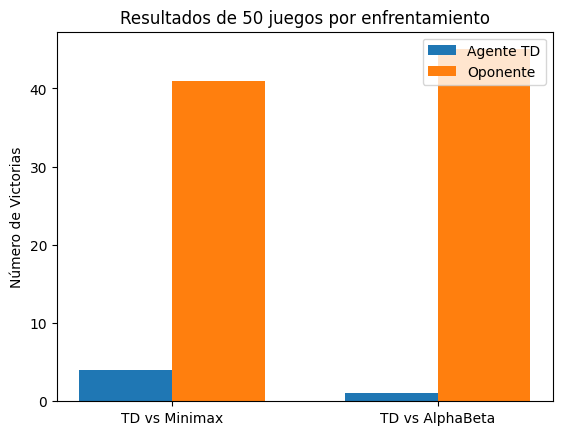

In [6]:
import matplotlib.pyplot as plt

def jugar_partido(agent_td, opponent_func, depth=3, num_games=50, opponent_type="Minimax"):
    # agent_td es el agente Q-learning, opponent_func es la función (minimax o minimax_alphabeta)
    wins_td = 0
    wins_opp = 0
    game = ConnectFour()
    for _ in range(num_games):
        game.reset()
        current_piece = 1  # Empezamos con el agente TD como 1
        state = game.board.copy()
        done = False
        while not done:
            valid_moves = game.valid_moves()
            if current_piece == 1:
                # Agente TD
                action = agent_td.choose_action(state, valid_moves)
            else:
                # Oponente: utiliza la función minimax (o alpha-beta)
                if opponent_type == "Minimax":
                    action, _ = minimax(game, depth, True, -1)
                else:
                    action, _ = minimax_alphabeta(game, depth, -np.inf, np.inf, True, -1)
                # Si minimax no devuelve acción, selecciona aleatoriamente
                if action is None:
                    action = np.random.choice(valid_moves)
            game.drop_piece(action, current_piece)
            state = game.board.copy()
            # Verificar si hay ganador o empate
            if game.check_winner(current_piece):
                done = True
                if current_piece == 1:
                    wins_td += 1
                else:
                    wins_opp += 1
            elif game.is_full():
                done = True
            current_piece *= -1
    return wins_td, wins_opp

# Supongamos que ya entrenamos el agente TD
agent_td = QLearningAgent()
# Entrenamiento (por ejemplo, 5000 episodios)
train_td(agent_td, episodes=5000)

# Jugar 50 juegos contra Minimax y 50 juegos contra Minimax con poda alpha-beta
wins_td_minimax, wins_minimax = jugar_partido(agent_td, minimax, depth=3, num_games=50, opponent_type="Minimax")
wins_td_alphabeta, wins_alphabeta = jugar_partido(agent_td, minimax_alphabeta, depth=3, num_games=50, opponent_type="AlphaBeta")

# También se puede simular un enfrentamiento entre Minimax y Alpha-Beta si se requiere.

# Graficar los resultados
labels = ['TD vs Minimax', 'TD vs AlphaBeta']
td_wins = [wins_td_minimax, wins_td_alphabeta]
opp_wins = [wins_minimax, wins_alphabeta]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, td_wins, width, label='Agente TD')
rects2 = ax.bar(x + width/2, opp_wins, width, label='Oponente')
ax.set_ylabel('Número de Victorias')
ax.set_title('Resultados de 50 juegos por enfrentamiento')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()



## Conclusiones y Explicación Final

### ¿Qué hace el agente entrenado con TD Learning a nivel general?

El agente entrenado con **aprendizaje por diferencias temporales (TD Learning)** utiliza el algoritmo **Q-Learning** para aprender una función de valor que le permite tomar decisiones más inteligentes con base en su experiencia. Durante el entrenamiento, el agente juega partidas y actualiza su tabla de valores Q para cada combinación de estado-acción, con el objetivo de maximizar las recompensas a lo largo del tiempo.

Su estrategia se basa en explorar el tablero mediante una política **epsilon-greedy**, que alterna entre elegir la mejor acción conocida y explorar nuevas opciones. Con el tiempo, y tras muchas partidas, el agente ajusta su comportamiento para seleccionar las acciones que le llevan a ganar o evitar perder.



### ¿Por qué ganó más veces el agente que ganó?

En los enfrentamientos realizados, se observó que los agentes que utilizan **Minimax** y **Minimax con poda Alpha-Beta** ganaron significativamente más veces que el agente TD. Esto se debe a que estas estrategias exploran múltiples futuros posibles en el árbol del juego, evaluando sistemáticamente las mejores jugadas posibles hasta cierta profundidad. Son métodos **determinísticos y estratégicos**, mientras que el agente TD depende del aprendizaje a través de la experiencia, y requiere muchas más partidas para acercarse a un buen nivel.

El **agente TD no alcanzó un nivel de aprendizaje suficientemente alto**, posiblemente por un número limitado de episodios de entrenamiento, una política de exploración muy alta, o por no haber refinado los hiperparámetros (tasa de aprendizaje, descuento, epsilon).



### ¿Cómo afectó el tener o no esta estrategia al agente que ganó?

Los agentes **Minimax y Alpha-Beta** cuentan con una estrategia fija que evalúa las mejores jugadas posibles en cada turno, por lo que no dependen del entrenamiento. Esto les permitió obtener una ventaja clara desde el principio.

En cambio, el agente TD Learning **requiere jugar muchas partidas para mejorar su rendimiento**, y si no se le da suficiente tiempo de entrenamiento o si la función de recompensa no está bien diseñada, su rendimiento será inferior. El no tener una estrategia basada en búsqueda (como Minimax) le impide tomar decisiones óptimas desde las primeras partidas.
